# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [8]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [9]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [10]:
print(boston.target.shape)

(506,)


In [11]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

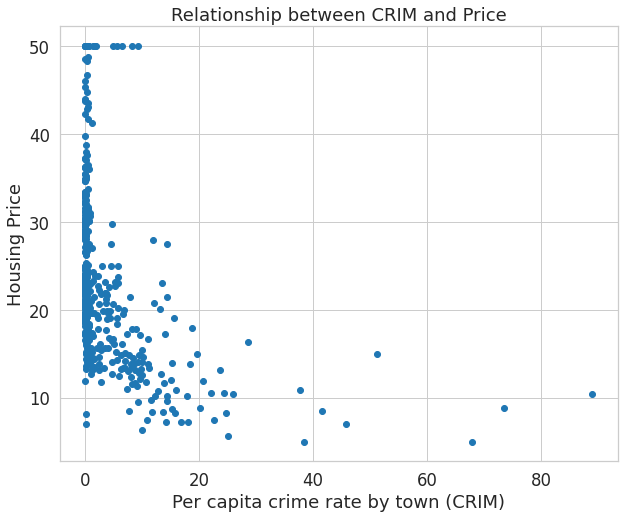

In [13]:
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(10,8))
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

### QA --->

1. crim rate vs House Price --> Non-linear relationship 
   - If the crim rate is over 20%, house price stays under $20,000 (unit? thousands)
   

2. number of room vs House Price --> Positive linear relationship


3. pupil-to-teacher ratio in schools vs House Price --> Close to negative linear relationship but not clear. Too many outliers/extreme values


# your turn: describe relationship

Text(0.5, 1.0, 'Relationship between RM and Price')

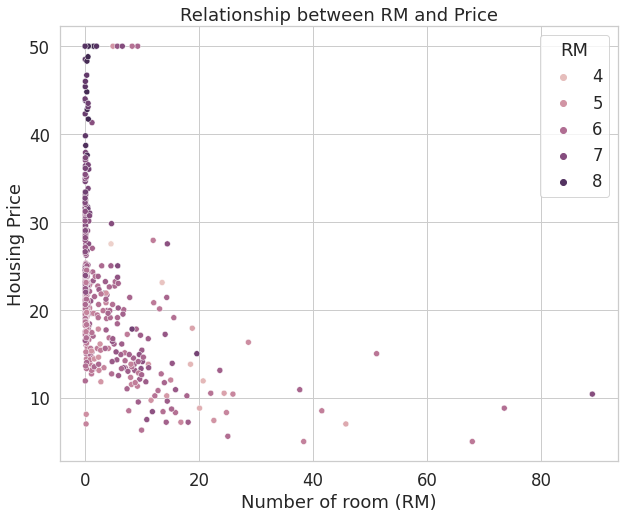

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CRIM", 
                y="PRICE", 
                hue="RM",
                data=bos)
plt.xlabel("Number of room (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5, 1.0, 'Relationship between CRIM and Price')

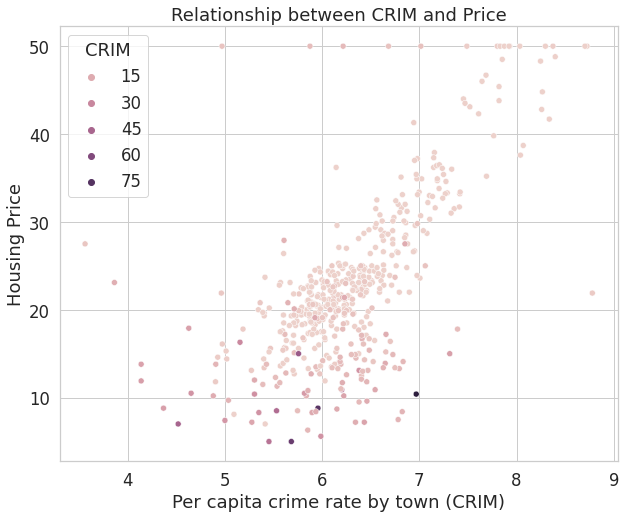

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="RM", 
                y="PRICE", 
                hue="CRIM",
                data=bos)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

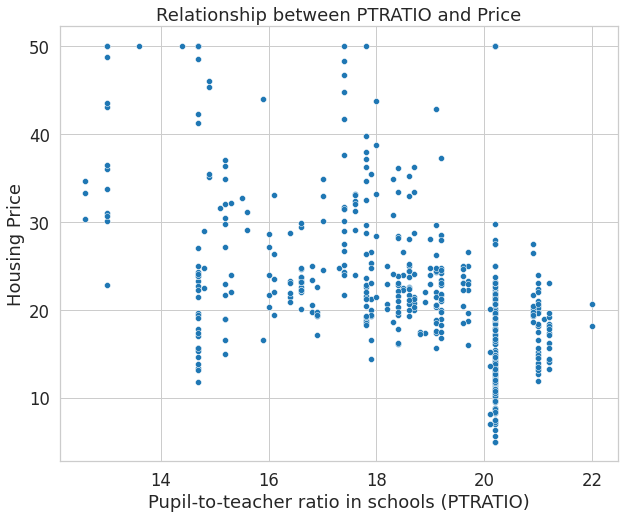

In [16]:
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(10,8))
sns.scatterplot(x="PTRATIO", 
                y="PRICE",
                data=bos)
plt.xlabel("Pupil-to-teacher ratio in schools (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

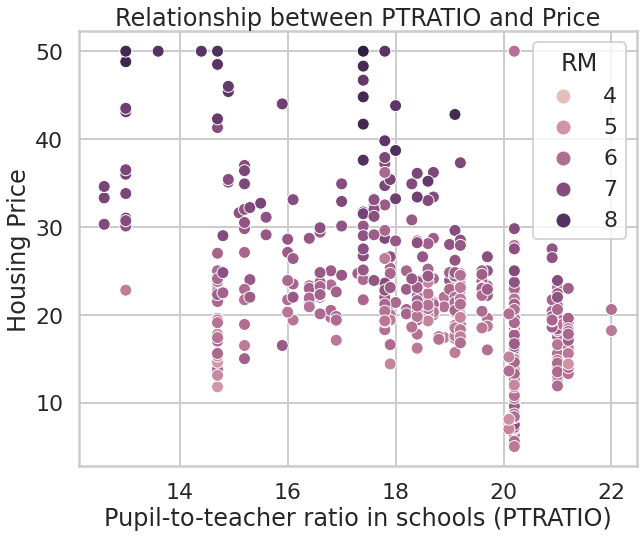

In [17]:
sns.set_context("poster", font_scale=1)
plt.figure(figsize=(10,8))
sns.scatterplot(x="PTRATIO", 
                y="PRICE", 
                hue="RM",
                data=bos)
plt.xlabel("Pupil-to-teacher ratio in schools (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

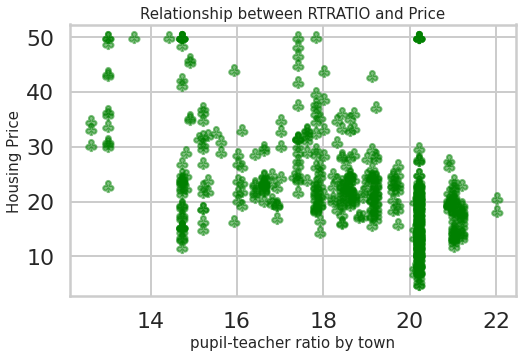

In [18]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.figure(figsize=(8,5))
plt.scatter(bos.PTRATIO, bos.PRICE, marker=r'$\clubsuit$', c='green', alpha = 0.5)
plt.xlabel("pupil-teacher ratio by town", fontsize=15)
plt.ylabel("Housing Price", fontsize=15)
plt.title("Relationship between RTRATIO and Price", fontsize=15)
plt.show()

<AxesSubplot:xlabel='PTRATIO', ylabel='PRICE'>

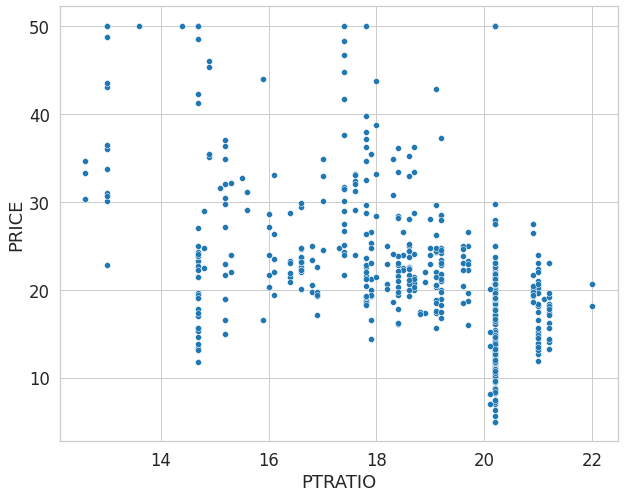

In [19]:
# Using Seaborn
sns.set_context("notebook", font_scale=1.5)
plt.figure(figsize=(10,8))
sns.scatterplot(x="PTRATIO", y="PRICE", data=bos)

Text(0.5, 1.0, 'Relationship between AGE and Price')

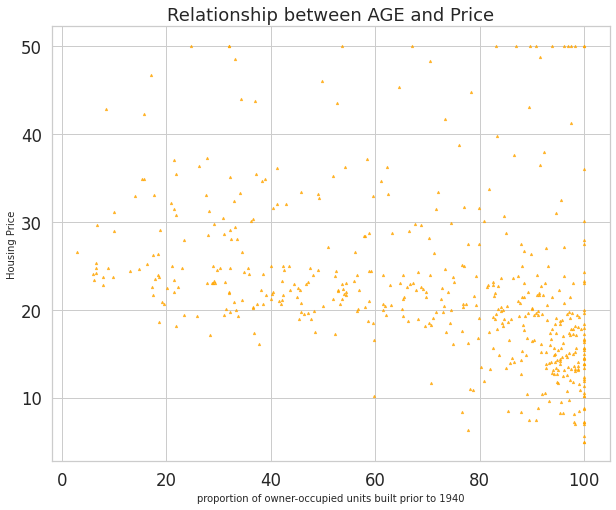

In [20]:
# your turn: create some other scatter plots
plt.figure(figsize=(10,8))
plt.scatter(bos.AGE, bos.PRICE, marker = '^', c = 'orange', s = 5, alpha = 0.7)
plt.xlabel('proportion of owner-occupied units built prior to 1940', fontsize = 10)
plt.ylabel("Housing Price", fontsize=10)
plt.title("Relationship between AGE and Price")

Text(0.5, 1.0, 'Relationship between DIS and Price')

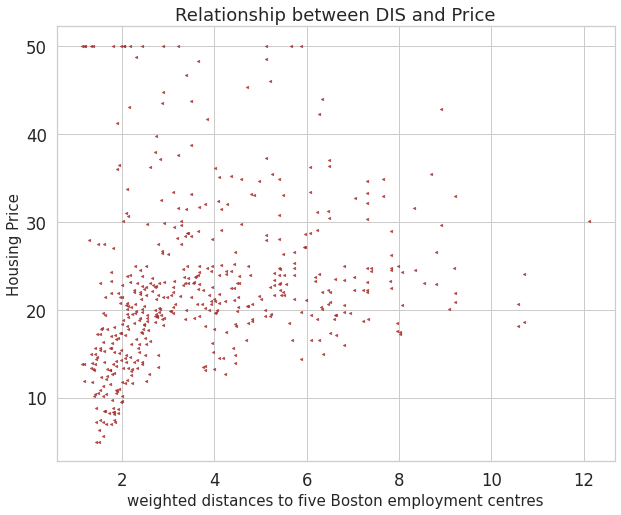

In [21]:
# your turn: create some other scatter plots
plt.figure(figsize=(10,8))
plt.scatter(bos.DIS, bos.PRICE, marker = '<', c = 'brown', s = 5, alpha = 0.7)
plt.xlabel('weighted distances to five Boston employment centres', fontsize = 15)
plt.ylabel("Housing Price", fontsize=15)
plt.title("Relationship between DIS and Price")

Text(0.5, 1.0, 'Relationship between RAD and Price')

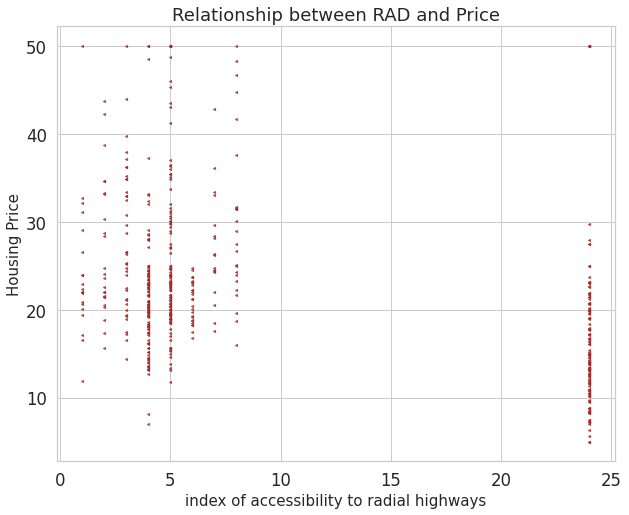

In [22]:
# your turn: create some other scatter plots
plt.figure(figsize=(10,8))
plt.scatter(bos.RAD, bos.PRICE, marker = '<', c = 'brown', s = 5, alpha = 0.7)
plt.xlabel('index of accessibility to radial highways', fontsize = 15)
plt.ylabel("Housing Price", fontsize=15)
plt.title("Relationship between RAD and Price")

### QA --->

Since the data is about the housing values in suburbs of Boston, people working in the centre will consider the distance and the accessibility to radial highways as important factors. The house buyers could be retired or driving their car based on non-linear relationship between RAD and Price. 

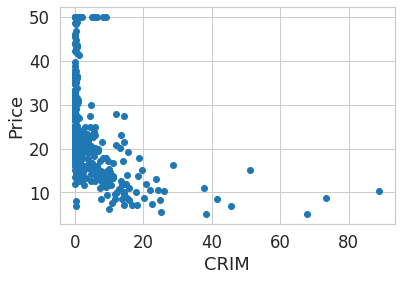

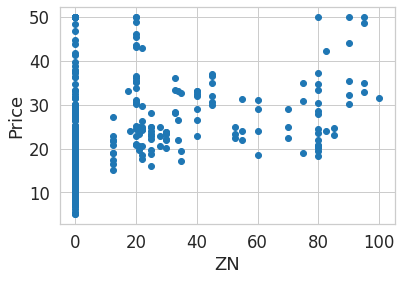

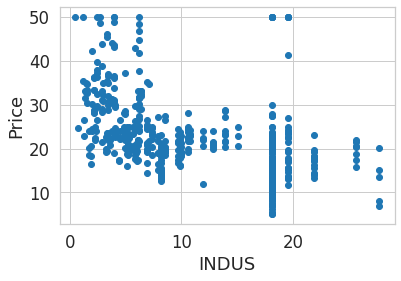

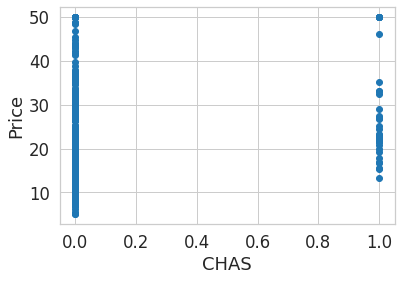

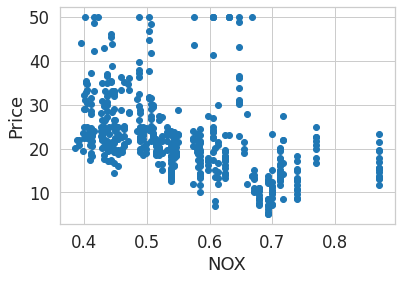

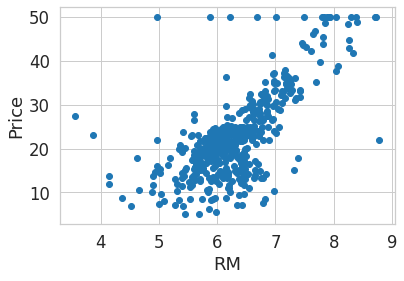

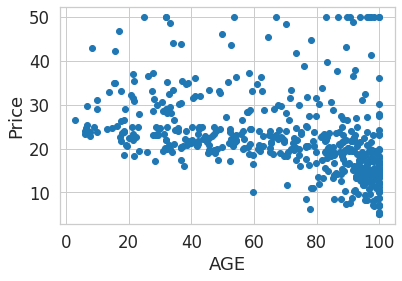

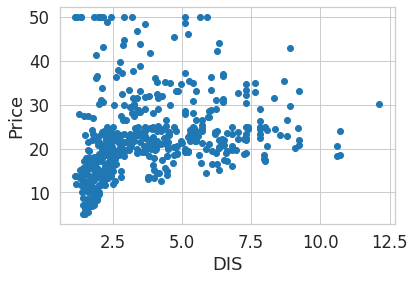

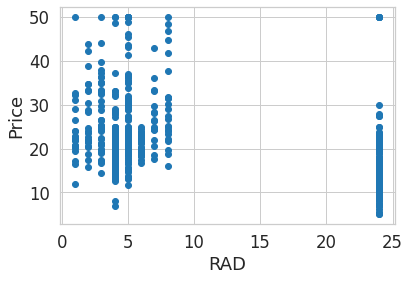

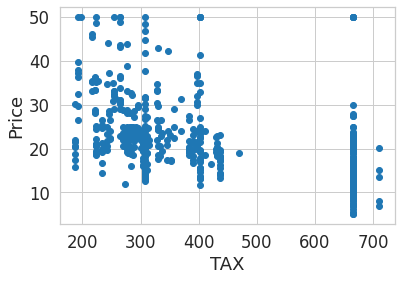

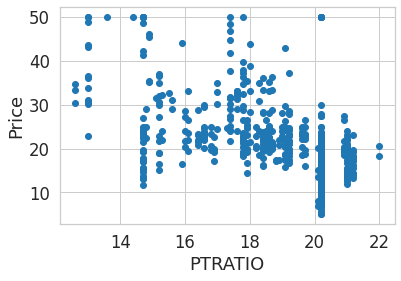

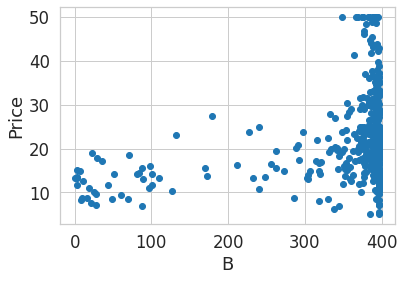

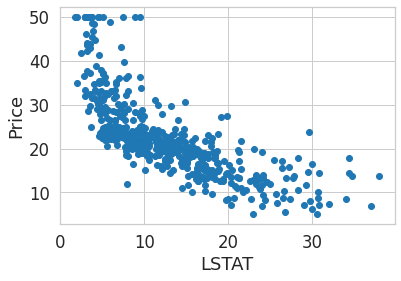

In [23]:
X = bos.drop('PRICE', axis = 1)
y = bos.PRICE

for i in X.columns:  
    plt.scatter(X[i], y)
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.show()

In [24]:
from pandas_profiling import ProfileReport
profile = ProfileReport(bos, title="Pandas Profiling Report")

In [25]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

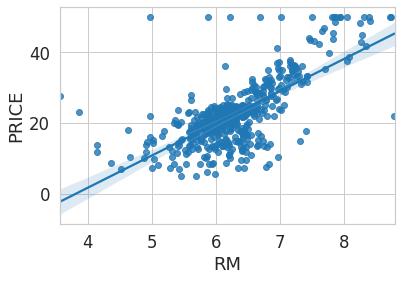

In [26]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

<AxesSubplot:xlabel='PTRATIO', ylabel='PRICE'>

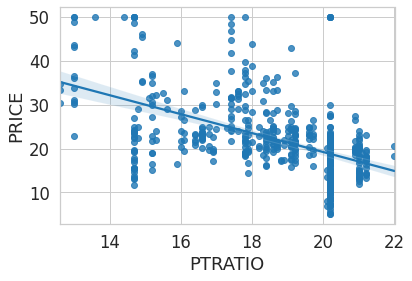

In [27]:
sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True)

<AxesSubplot:xlabel='DIS', ylabel='PRICE'>

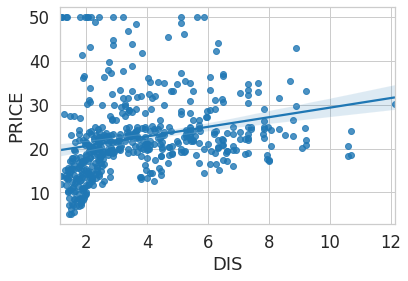

In [28]:
sns.regplot(y="PRICE", x="DIS", data=bos, fit_reg = True)

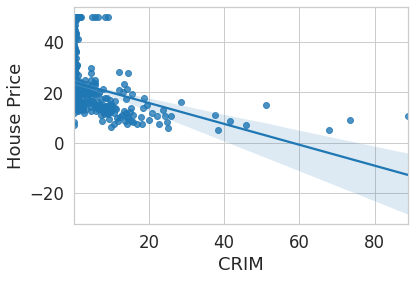

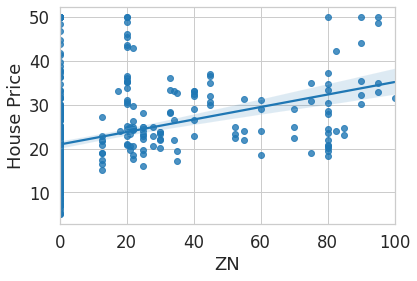

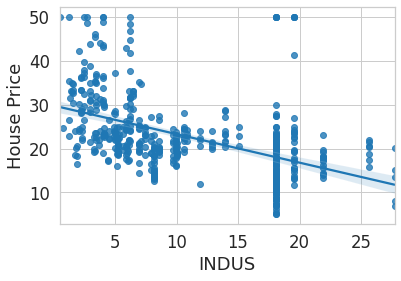

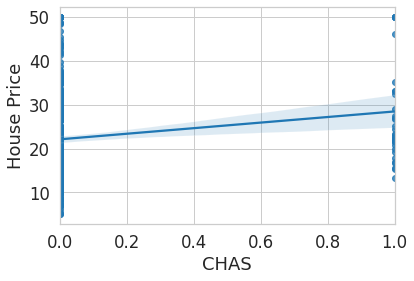

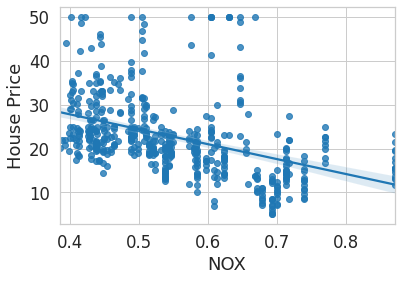

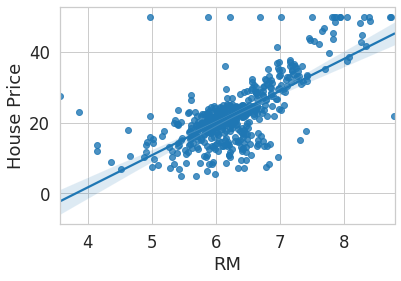

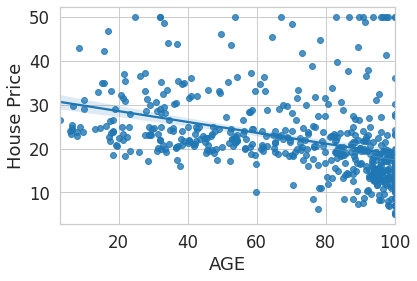

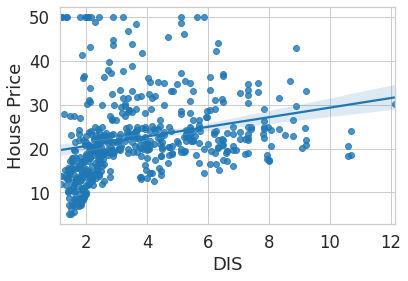

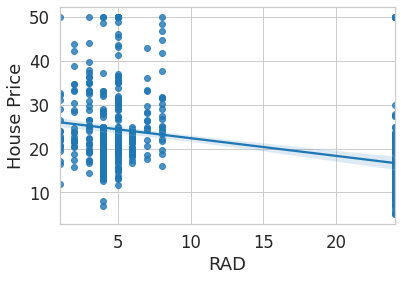

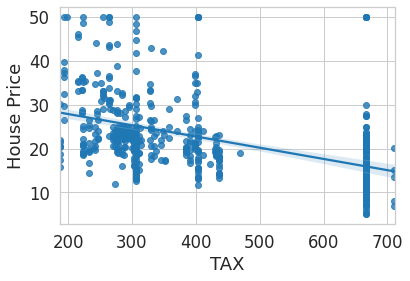

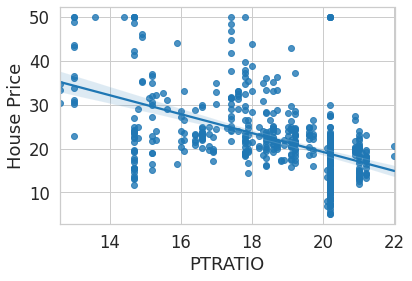

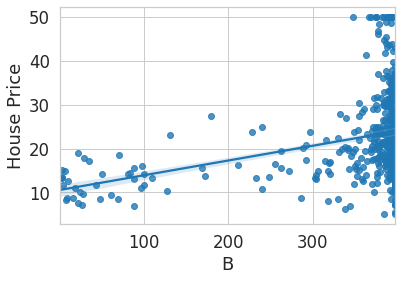

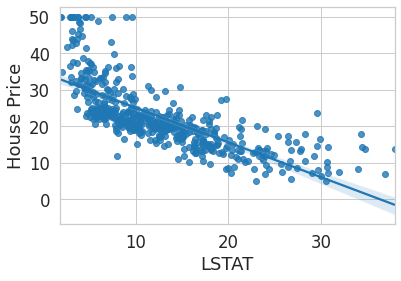

In [29]:
for i in X.columns:  
    sns.regplot(y="PRICE", x=i, data=bos, fit_reg= True)
    plt.xlabel(i)
    plt.ylabel("House Price")
    plt.show()

### Histograms
***


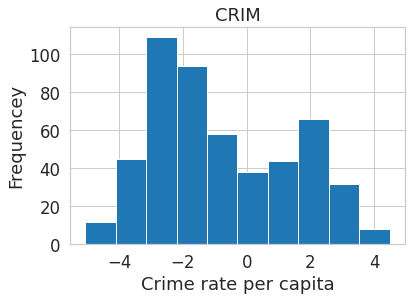

In [30]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

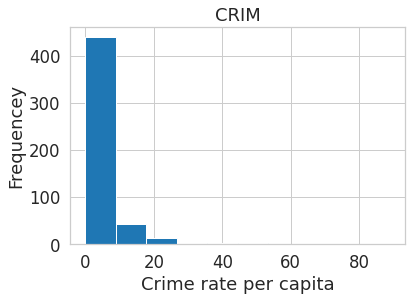

In [31]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

### QA --->

It is hard to analyze the crime rate without log scale since most of crime rate is under 10. By taking the logarithm of the crime rate per capital, we can break down the x tick size smaller. Rescaling can be for this clusted data

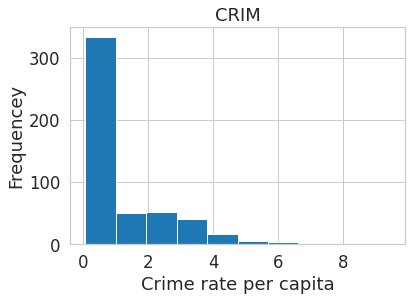

In [32]:
plt.hist(np.sqrt(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

In [33]:
from scipy import stats

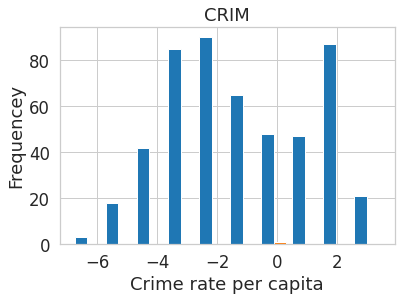

In [34]:
plt.hist(stats.boxcox(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

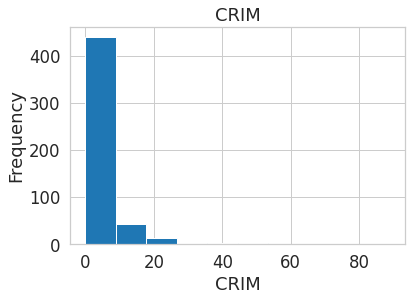

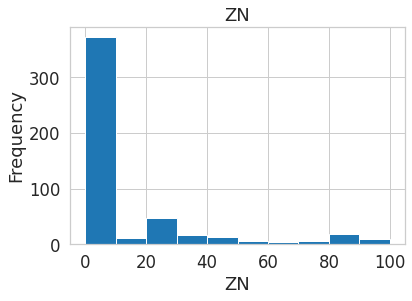

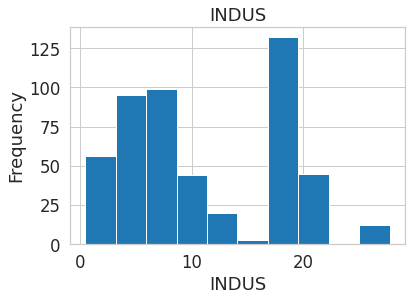

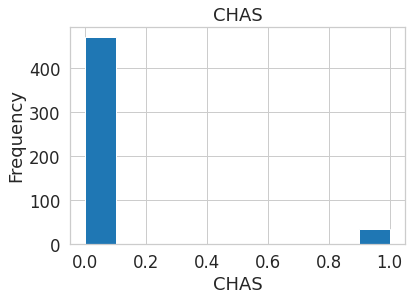

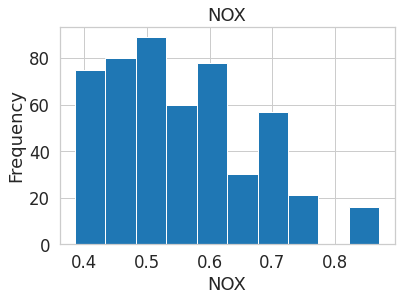

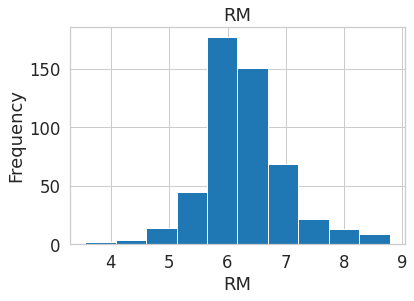

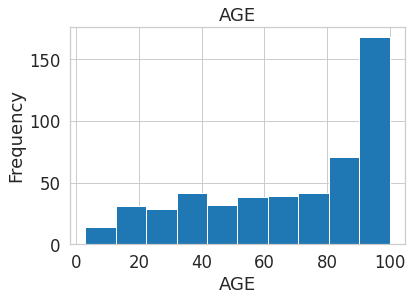

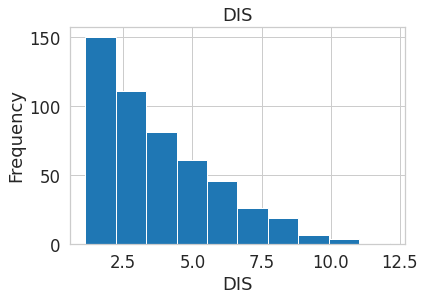

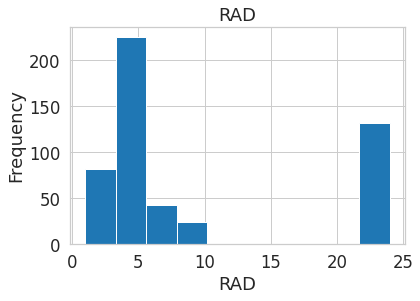

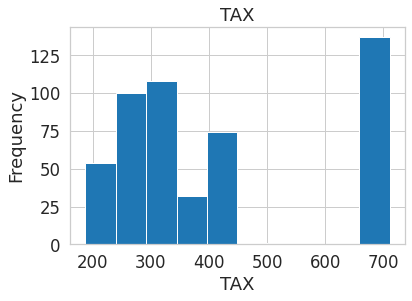

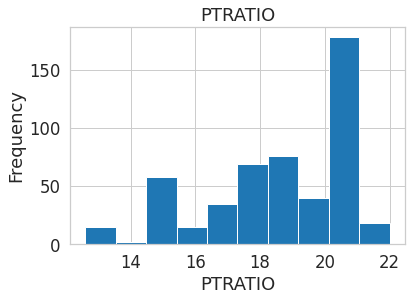

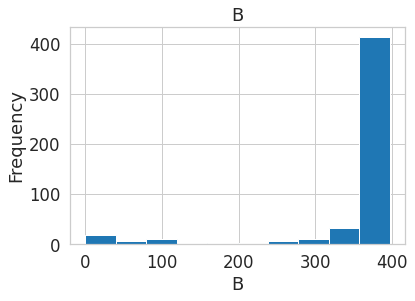

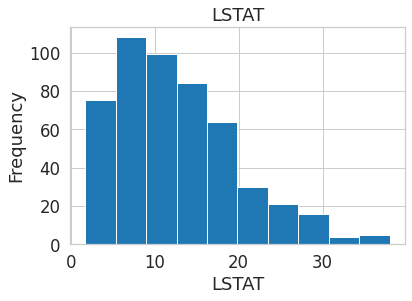

In [35]:
for i in X.columns:  
    plt.hist(X[i])
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

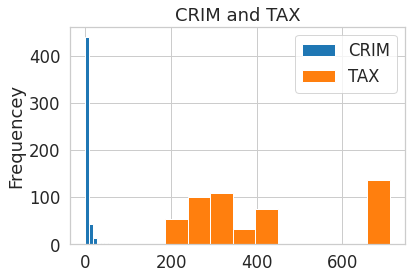

In [36]:
plt.hist(bos['CRIM'])
plt.hist(bos['TAX'])
plt.title("CRIM and TAX")
plt.ylabel("Frequencey")
plt.legend(["CRIM", "TAX"], loc='best')
plt.show()

<AxesSubplot:>

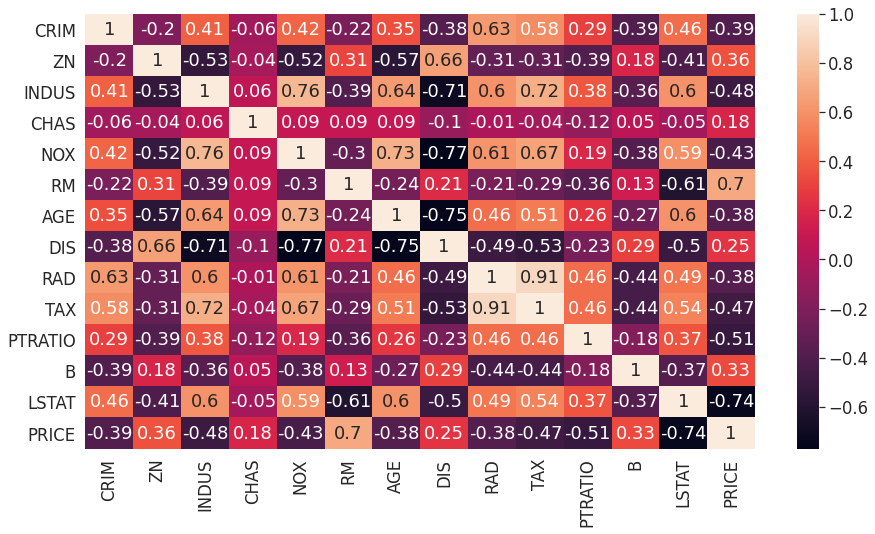

In [37]:
#correlation between the variables
plt.figure(figsize=(15,8))
correlation_matrix=bos.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [38]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           2.49e-74
Time:                        15:02:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

/opt/conda/envs/springboard/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

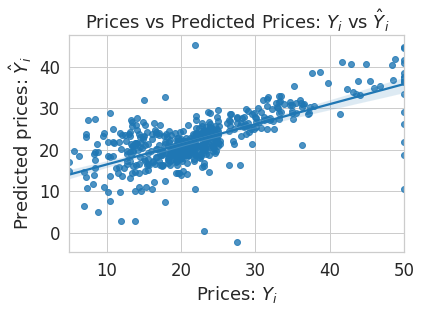

In [40]:
sns.regplot(bos['PRICE'], m.fittedvalues, fit_reg = True)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

### QA --->

If the actual price is less than 50k, the predicted and actual values have positive linear relationship, showing the house price under 50,000 is well predicted using OLS methods 

### Fitting Linear Regression using `sklearn`


In [41]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
y = bos.PRICE
# This creates a LinearRegression object
lm2 = LinearRegression()
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [42]:
# Look inside lm object
# lm.<tab>
lm2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lm2.score(X, y)

0.7406426641094095

In [44]:
lm2.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [45]:
lm2.intercept_

36.45948838508978

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [47]:
# Use all 13 predictors to fit linear regression model
lm2.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [48]:
# your turn
# Not having an intercept
m_no_intercept = ols('PRICE ~ RM -1',bos).fit()
print(m_no_intercept.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):                   3.74e-256
Time:                        16:31:59   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## QA-->
The F-stat and R^2 look good but it is recommended to have an intercept. Not having an intercept can introduce  bias to the other features.
The house price wouldn't be zero when the room number is zero in this example since there is land or studio.
 

In [49]:
m_no_intercept2 = LinearRegression(fit_intercept=False).fit(X, y)
m_no_intercept2

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [50]:
m_no_intercept2.score(X, y)

0.7137381380515405

In [51]:
m_no_intercept2.coef_

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

In [52]:
# The coefficients
pd.DataFrame({'features': X.columns, 'Est. Coefficients': m_no_intercept2.coef_})[['features', 'Est. Coefficients']]

,features,Est. Coefficients
0,CRIM,-0.092897
1,ZN,0.048715
2,INDUS,-0.004060
3,CHAS,2.853999
4,NOX,-2.868436
5,RM,5.928148
6,AGE,-0.007269
7,DIS,-0.968514
8,RAD,0.171151
9,TAX,-0.009396


In [53]:
m_no_intercept2.intercept_

0.0

In [54]:
lm3 = ols('PRICE ~ RM + INDUS + NOX + AGE + DIS + TAX',bos).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     122.2
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.21e-94
Time:                        16:32:27   Log-Likelihood:                -1611.5
No. Observations:                 506   AIC:                             3237.
Df Residuals:                     499   BIC:                             3267.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2968      4.059     -1.059      0.2

In [55]:
y = bos['PRICE'] 
predicted_y = lm3.fittedvalues

In [56]:
y.shape

(506,)

In [57]:
predicted_y

0      27.079715
1      24.577942
2      31.494301
3      30.676860
4      31.238046
         ...    
501    27.702966
502    23.885408
503    29.511669
504    27.983048
505    22.667436
Length: 506, dtype: float64

In [58]:
df1 = pd.DataFrame({'Actual':y, 'Predicted': predicted_y})
df1.head()

,Actual,Predicted
0,24.0,27.079715
1,21.6,24.577942
2,34.7,31.494301
3,33.4,30.676860
4,36.2,31.238046


In [59]:
df1['Residual'] = df1['Actual']-df1['Predicted']

In [60]:
df1.head()

,Actual,Predicted,Residual
0,24.0,27.079715,-3.079715
1,21.6,24.577942,-2.977942
2,34.7,31.494301,3.205699
3,33.4,30.676860,2.723140
4,36.2,31.238046,4.961954


/opt/conda/envs/springboard/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


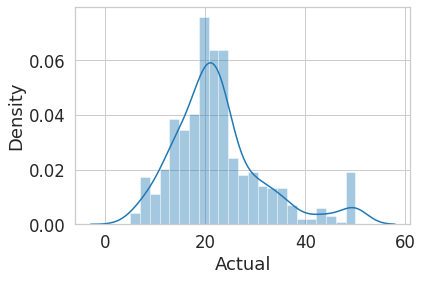

In [92]:
sns.distplot(df1['Actual'] )
plt.show()

/opt/conda/envs/springboard/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


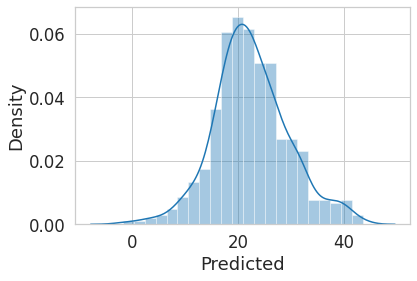

In [91]:
sns.distplot(df1['Predicted'] )
plt.show()

### QA -->
Q. Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). 
To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

A:Yes? 


Q. True or false. To use linear regression,  𝑌  must be normally distributed. Explain your answer.

A:False. The price Y doesn't have to be normally distributed but residuals have to be.

## Assumptions of linear regression regarding residuals
1. Normality. If not, the randomness of residuals is lost, which implies the model is not able to explain the relation in the data
2. Zero mean. i.e., the error terms are normally distributed around zero
3. Constant variance (homogeneity or homoscedasticit). It is assumed that the residual terms have the same (but unknown) variance.
4. Independent error (pair-wise co-variance is zero). No correlation between the residuals and the predicted values, or among the residuals themselves

## 1. Normality

/opt/conda/envs/springboard/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


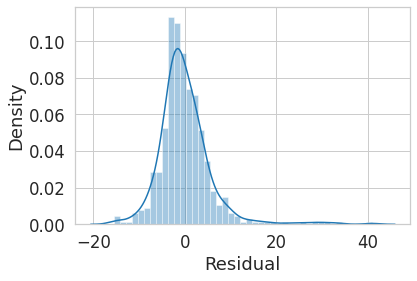

In [63]:
sns.distplot(df1['Residual'] )
plt.show()

In [64]:
np.var(df1['Residual'])

34.181247901385305

In [65]:
np.mean(df1['Residual'])

2.10238502057634e-13

In [66]:
stats.normaltest(df1["Residual"])

NormaltestResult(statistic=274.9124750479469, pvalue=2.011474541131796e-60)

In [67]:
stat, p = stats.normaltest(df1["Residual"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=274.912, p=0.000


In [68]:
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0, normal)')
else:
 print('Sample does not look Gaussian (reject H0, not normal)')

Sample does not look Gaussian (reject H0, not normal)


In [69]:
# The Shapiro-Wilk test 

stats.shapiro(df1['Residual'])
stat, p = stats.normaltest(df1["Residual"])
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0, normal)')
else:
 print('Sample does not look Gaussian (reject H0, not normal)')

Sample does not look Gaussian (reject H0, not normal)


### QA -->
Indenpendence of residual errors

1.Detect patterns in the plot of residual errors vs. the predicted values or the plot of residual errors vs actual values.

Text(0.5, 1.0, 'Residual errors versus the actual values')

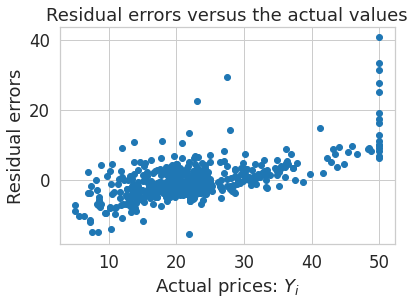

In [70]:
plt.scatter(df1['Actual'], df1['Residual'])
plt.ylabel("Residual errors")
plt.xlabel("Actual prices: $Y_i$")
plt.title("Residual errors versus the actual values")

- Positive linear pattern between residuals and actual prices if the actual prices are less than 50k. For prices over 50k, residuals are more or less pattern-less.

Text(0.5, 1.0, 'Residual errors versus the predicted values')

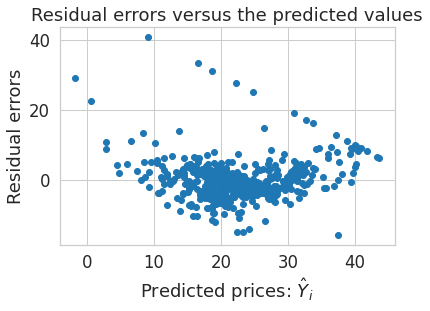

In [71]:
plt.scatter(df1['Predicted'], df1['Residual'])
plt.ylabel("Residual errors")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.title("Residual errors versus the predicted values")

- Positive linear pattern between residuals and actual prices in general 

In [72]:
df1.corr()

,Actual,Predicted,Residual
Actual,1.000000,7.714290e-01,6.363154e-01
Predicted,0.771429,1.000000e+00,-3.001180e-14
Residual,0.636315,-3.001180e-14,1.000000e+00


#QA. there is some correlation between the residuals and the predicted values -> some relation that regression model is not able to identify

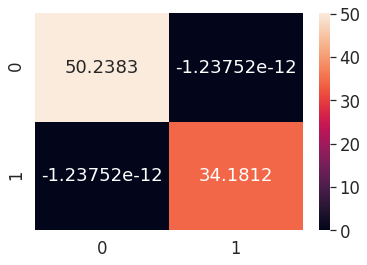

In [73]:
# co-variance
covMatrix = np.cov(df1['Predicted'], df1['Residual'], bias=True)
sns.heatmap(covMatrix,annot=True, fmt='g' )
plt.show()

<AxesSubplot:>

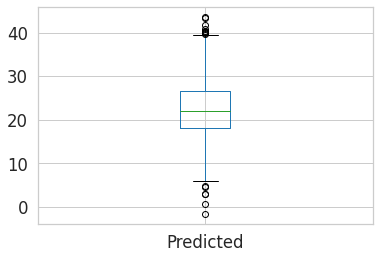

In [119]:
df1['Predicted'].plot(kind='box')

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [113]:
X = bos.drop(columns =['PRICE', 'CRIM', 'ZN', 'CHAS', 'RAD', 'PTRATIO', 'B', 'LSTAT', 'NOX'], axis = 1)
y = bos.PRICE
# This creates a LinearRegression object
lm4 = LinearRegression()
lm4

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
lm4.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
print('Estimated intercept coefficient: {}'.format(lm4.intercept_)) 

Estimated intercept coefficient: -8.760523210640624


In [116]:
print('Estimated coefficient: {}'.format(lm4.coef_)) 

Estimated coefficient: [-0.15905817  7.5546409  -0.07541026 -1.08395523 -0.01256261]


In [117]:
print('Number of coefficients: {}'.format(len(lm4.coef_)))

Number of coefficients: 5


In [118]:
# The coefficients
pd.DataFrame({'features': X.columns, 'Estimated Coefficients': lm4.coef_})[['features', 'Estimated Coefficients']]

,features,Estimated Coefficients
0,INDUS,-0.159058
1,RM,7.554641
2,AGE,-0.075410
3,DIS,-1.083955
4,TAX,-0.012563


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [80]:
# first five predicted prices
# lm3 is linear regression model with the independent variables: RM, INDUS, AGE, DIS, TAX
lm3.predict(X)[0:5]

array([27.47515856, 24.24915014, 31.36319841, 30.94626477, 31.43846009])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

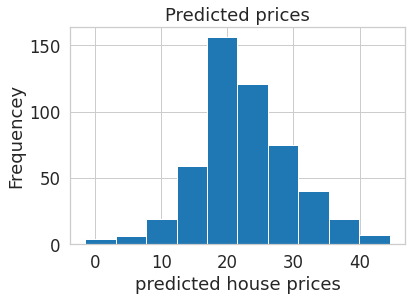

In [81]:
# your turn
predicted_prices = lm3.predict(X)
plt.hist(predicted_prices)
plt.title("Predicted prices")
plt.xlabel("predicted house prices")
plt.ylabel("Frequencey")
plt.show()

/opt/conda/envs/springboard/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


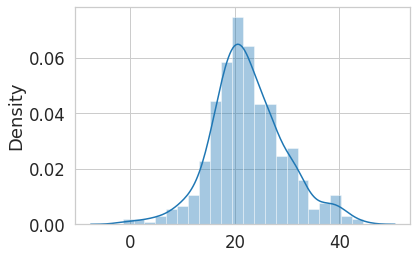

In [82]:
sns.distplot(predicted_prices)
plt.show()

### QA -->

Close to bell shape or normal distribution

In [121]:
stat, p =stats.normaltest(predicted_prices)

In [123]:
stat

11.071840171849889

In [124]:
p

0.003942579454800053

In [122]:
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0, normally distributed.)')
else:
 print('Sample does not look Gaussian (reject H0, not normally distributed.)')

Sample does not look Gaussian (reject H0, not normally distributed.)


Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

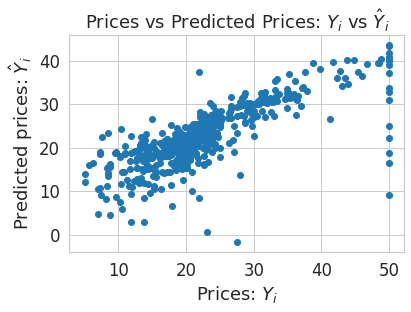

In [86]:
plt.scatter(y, df1['Predicted'])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

Text(0.5, 1.0, 'Fitted linear regression model')

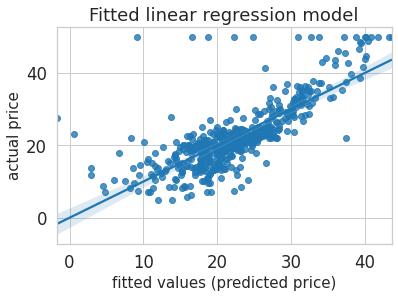

In [87]:
sns.regplot(y=y, x=df1['Predicted'], fit_reg = True)
plt.xlabel('fitted values (predicted price)', fontsize = 15)
plt.ylabel("actual price", fontsize=15)
plt.title("Fitted linear regression model")

Statsmodel --> powerful method for statistical analysis. It also follows the traditional model where we can check to see how well a given model fits the data and what variables affect the outcome. 

Scikit-learn --> machine learning tradition and it is used to find the best model for prediction.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [126]:
lm3 = ols('PRICE ~ RM + INDUS + NOX + AGE + DIS + TAX',bos).fit()
y = bos['PRICE'] 
predicted_y = lm3.fittedvalues

In [133]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     122.2
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.21e-94
Time:                        17:07:07   Log-Likelihood:                -1611.5
No. Observations:                 506   AIC:                             3237.
Df Residuals:                     499   BIC:                             3267.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2968      4.059     -1.059      0.2

In [129]:
RSS = np.sum((y - predicted_y) ** 2)
print('Residual Sum-of Squares(RSS) is %.2f' % RSS)

Residual Sum-of Squares(RSS) is 17295.71


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [134]:
ESS = np.sum((predicted_y - np.mean(y))**2)
print('The explained Sum-of-Squares(ESS) is ', ESS)

The explained Sum-of-Squares(ESS) is  25420.583976920057


In [136]:
print('The R^2 is %.3f' % (ESS/(ESS+RSS)))

The R^2 is 0.595


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [137]:
# your turn
X_train = bos[['PTRATIO']] # bos.PTRATIO --> doesn't work
y_train = bos.PRICE
# This creates a LinearRegression object
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
reg.intercept_

62.34462747483265

In [139]:
reg.coef_

array([-2.1571753])

Text(0.5, 1.0, 'Linear Regression for Housing Price vs Pupil-teacher Ratio')

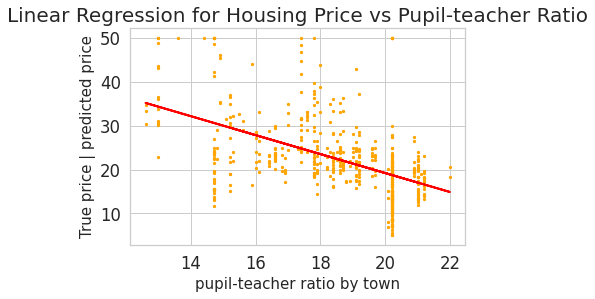

In [140]:
# Plot outputs
plt.scatter(bos.PTRATIO, bos.PRICE, c='orange', s =5)
plt.plot(bos.PTRATIO, reg.predict(X_train), color='red', linewidth=2)
plt.xlabel('pupil-teacher ratio by town', fontsize=15)
plt.ylabel('True price | predicted price', fontsize=15)
plt.title('Linear Regression for Housing Price vs Pupil-teacher Ratio', fontsize=20)

In [141]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficient and intercept
print('Coefficient: %.2f' % reg.coef_)
print('Intercept: %.2f' % reg.intercept_, '\n')

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, reg.predict(X_train)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, reg.predict(X_train)))

Coefficient: -2.16
Intercept: 62.34 

Mean squared error: 62.65
Coefficient of determination (R^2): 0.26


In [178]:
ESS =np.sum((reg.predict(X_train) - np.mean(y_train)) ** 2)
print('ESS is %.2f' % ESS)

ESS is 11014.28


In [179]:
RSS = np.sum((y_train  -  reg.predict(X_train))**2)
print('RSS is %.2f' % RSS)

RSS is 31702.01


In [180]:
TSS = ESS + RSS
print('TSS is %.2f' % TSS)

TSS is 42716.30


In [181]:
print('R^2 value : ', ESS / TSS)

R^2 value :  0.25784731800922267


In [182]:
# Number of observations
N = len(X_train)
# Number of variables
K = 1

In [183]:
r_squared = reg.score(X_train, y_train)
r_squared

0.257847318009223

In [184]:
F = (r_squared / (1 - r_squared)) * ((N - K - 1) / K)
print("F-statistic =", F)

F-statistic = 175.10554287569548


## QA --> 
pupil-teacher ratio by town & housing price have the negative correlation. 
F-stat is high -> not reject null hypothesis -> regression coefficients are statistically significant.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [185]:
x_3 = bos[['CRIM', 'RM', 'PTRATIO']]

In [186]:
lr = LinearRegression() 
lr.fit(x_3, bos['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
lr.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [188]:
# Number of observations
N = len(x_3)
N

506

In [189]:
# Number of variables
K = len(x_3.columns)
K

3

In [190]:
R2 = lr.score(x_3, bos['PRICE'])
R2

0.5943412940723471

--> R^2 is higher than the one predicted by PTRATIO only. This tells us CRIM RM PTRATIO can be good predictors together for estimating house price 

In [191]:
F2 = (R2 / (1 - R2)) * ((N - K - 1) / K)

print("F-statistic =", F2)

F-statistic = 245.16449030064626


---> High F-stat.  Regression coefficients are statistically significant

<AxesSubplot:>

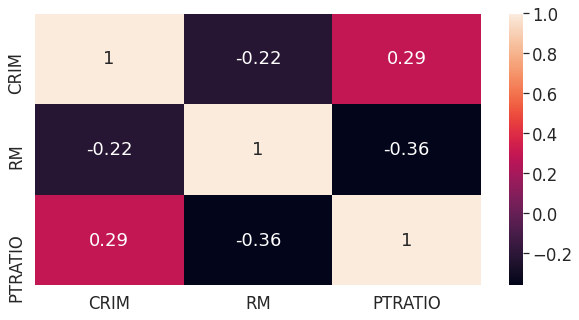

In [195]:
#correlation between the variables
plt.figure(figsize=(10,5))
correlation3_matrix=x_3.corr().round(2)
sns.heatmap(data=correlation3_matrix, annot=True)

--> CRIM RM PTRATIO are not highly correlated to each other. Can be used together.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

## Q: Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

Text(0.5, 1.0, 'Residual errors vs the predicted values')

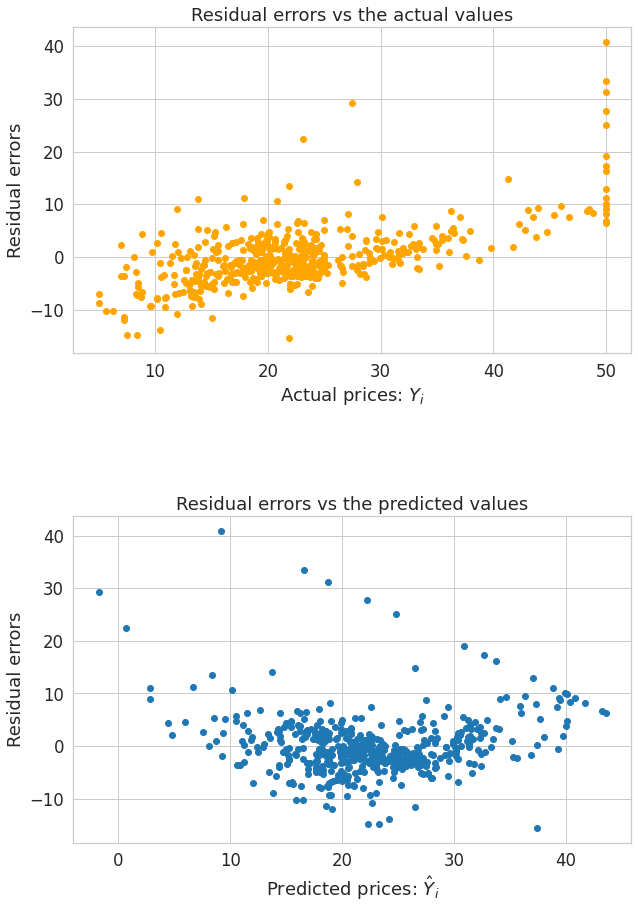

In [156]:
# Your turn.
fig, axs = plt.subplots(2, figsize=(10,15))
# make a little extra space between the subplots
fig.subplots_adjust(hspace=.5)

axs[0].scatter(df1['Actual'], df1['Residual'], color='orange')
axs[0].set_ylabel("Residual errors")
axs[0].set_xlabel("Actual prices: $Y_i$")
axs[0].set_title("Residual errors vs the actual values")

axs[1].scatter(df1['Predicted'], df1['Residual'])
axs[1].set_ylabel("Residual errors")
axs[1].set_xlabel("Predicted prices: $\hat{Y}_i$")
axs[1].set_title("Residual errors vs the predicted values")


A: Some positive linear pattern between residuals and predicted prices. There are some clusters. 
Independent residual assumption is violated. i.e. residuals are not distributed uniformly randomly around the zero x-axes. 
Some of the errors are not independent, which can the loss of uniqueness of the least square's solution / normal equation solution

## Q: Exercise: Construct a quantile plot of the residuals. What does the plot tell you? 

In [196]:
import statsmodels.api as sm

In [197]:
plt.close('all')

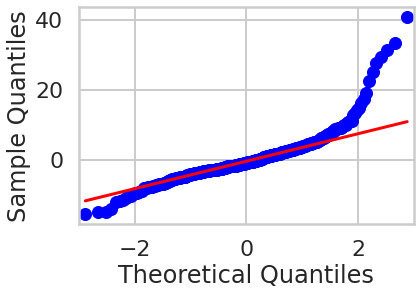

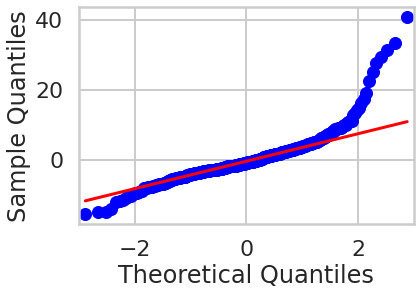

In [211]:
# plt.figure(figsize=(15,8))
sm.qqplot(df1['Residual'],  line='q')

---> There is positive skew with the residual error data.

/opt/conda/envs/springboard/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


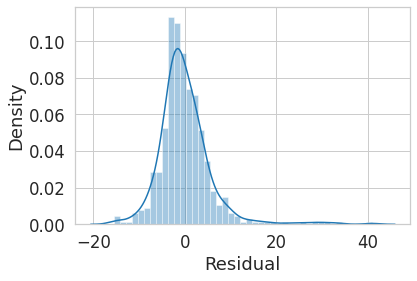

In [161]:
sns.distplot(df1['Residual'])
plt.show()

A: It is not fit to the straight line. Residuals are not normaly distributed in this model

## QA --> 

Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

A: 
fitted vs residual --> it can be used to check indenpendent & homoscedastidity. shows outliers in the data

quantitle plot --> it shows if the data is normally distributed.

## QA --> 

Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.


<Figure size 1440x720 with 0 Axes>

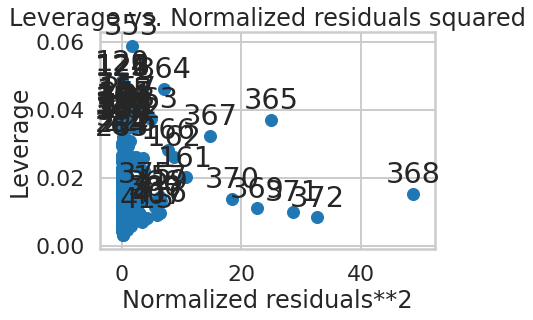

In [217]:
from statsmodels.graphics.regressionplots import *

# sns.set_context("poster", font_scale=1)
plt.figure(figsize=(20,10))
plot_leverage_resid2(lm3)
plt.show()

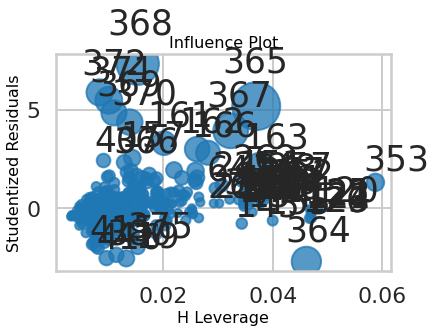

In [215]:
influence_plot(lm3)
plt.show()

In [254]:
X_removedOutlier = X.drop([0, 368, 365, 372] , axis = 0)
y_removedOutlier = y.drop([0, 368, 365, 372] , axis = 0)

In [255]:
X_removedOutlier.head()

,INDUS,RM,AGE,DIS,TAX
1,7.07,6.421,78.9,4.9671,242.0
2,7.07,7.185,61.1,4.9671,242.0
3,2.18,6.998,45.8,6.0622,222.0
4,2.18,7.147,54.2,6.0622,222.0
5,2.18,6.430,58.7,6.0622,222.0


In [256]:
X_removedOutlier.shape

(502, 5)

In [258]:
y_removedOutlier.shape

(502,)

In [259]:
lm5 = LinearRegression()
lm5.fit(X_removedOutlier, y_removedOutlier)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [261]:
Rsquared = lm5.score(X_removedOutlier, y_removedOutlier)
print("R^2 =", Rsquared)

R^2 = 0.6698901002451995


   dfb_Intercept    dfb_RM   cooks_d  standard_resid  hat_diag  \
0       0.002374 -0.003272  0.000037       -0.177914  0.002314   
1       0.001200 -0.002841  0.000111       -0.328930  0.002051   
2      -0.031203  0.034392  0.000952        0.601919  0.005228   
3      -0.026514  0.029973  0.000885        0.662450  0.004018   
4      -0.043598  0.048255  0.001937        0.881528  0.004959   

   dffits_internal  student_resid    dffits  
0        -0.008569      -0.177743 -0.008561  
1        -0.014911      -0.328639 -0.014898  
2         0.043636       0.601538  0.043608  
3         0.042073       0.662081  0.042050  
4         0.062234       0.881332  0.062220  


Leverage vs. Studentized Residuals


/opt/conda/envs/springboard/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Studentized Residuals')

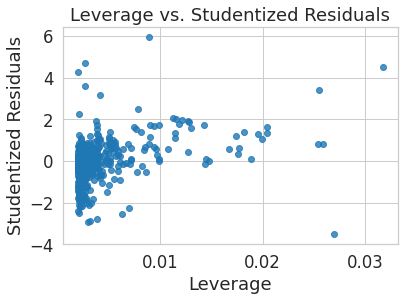

In [165]:
influence = m.get_influence()
inf_sum = influence.summary_frame()
print(inf_sum.head())

student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

print ('\n')
print ('Leverage vs. Studentized Residuals')

sns.regplot(leverage, m.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')